### Importing Important Libraries for EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#Reading Data

df = pd.read_csv(r'F:\Fivrr Projects Codes\DS_ML_Project\adverts.csv')
df.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [4]:
#Checking total Number of records in our dataset
df.shape

(402005, 12)

In [5]:
#List down total number of columns in our dataset
df.columns

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')

In [6]:
#Checking short info about our dataset using info function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


Now we can easily see that we have some missing values in our data like in reg_code, standard_colour

In [8]:
#Now checking quick statistics of the dataset using .describe() function
#describe function gives us information about numerical features/columns
df.describe()

,public_reference,mileage,year_of_registration,price
count,4.020050e+05,401878.000000,368694.000000,4.020050e+05
mean,2.020071e+14,37743.595656,2015.006206,1.734197e+04
std,1.691662e+10,34831.724018,7.962667,4.643746e+04
min,2.013072e+14,0.000000,999.000000,1.200000e+02
25%,2.020090e+14,10481.000000,2013.000000,7.495000e+03
50%,2.020093e+14,28629.500000,2016.000000,1.260000e+04
75%,2.020102e+14,56875.750000,2018.000000,2.000000e+04
max,2.020110e+14,999999.000000,2020.000000,9.999999e+06


In [12]:
#We have include parameter in describe function that will help us to see statistics of categorical values as well
#Lets try include = 'all'
df.describe(include='all')

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
count,4.020050e+05,401878.000000,370148,396627,402005,402005,402005,368694.000000,4.020050e+05,401168,402005,401404
unique,NaN,NaN,72,22,110,1168,2,NaN,NaN,16,2,9
top,NaN,NaN,17,Black,BMW,Golf,USED,NaN,NaN,Hatchback,False,Petrol
freq,NaN,NaN,36738,86287,37376,11583,370756,NaN,NaN,167315,400210,216929
mean,2.020071e+14,37743.595656,NaN,NaN,NaN,NaN,NaN,2015.006206,1.734197e+04,NaN,NaN,NaN
std,1.691662e+10,34831.724018,NaN,NaN,NaN,NaN,NaN,7.962667,4.643746e+04,NaN,NaN,NaN
min,2.013072e+14,0.000000,NaN,NaN,NaN,NaN,NaN,999.000000,1.200000e+02,NaN,NaN,NaN
25%,2.020090e+14,10481.000000,NaN,NaN,NaN,NaN,NaN,2013.000000,7.495000e+03,NaN,NaN,NaN
50%,2.020093e+14,28629.500000,NaN,NaN,NaN,NaN,NaN,2016.000000,1.260000e+04,NaN,NaN,NaN
75%,2.020102e+14,56875.750000,NaN,NaN,NaN,NaN,NaN,2018.000000,2.000000e+04,NaN,NaN,NaN


In [13]:
#If you only want to check categorical values statistics then use
#include='object', lets have a try
df.describe(include='object')

,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,body_type,fuel_type
count,370148,396627,402005,402005,402005,401168,401404
unique,72,22,110,1168,2,16,9
top,17,Black,BMW,Golf,USED,Hatchback,Petrol
freq,36738,86287,37376,11583,370756,167315,216929


In [16]:
#Now checking null values in our dataset
#Two functions to get same result
#one is isna for nan values other one is isnull() for null values but it will gives the same result
df.isna().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

In [26]:
#Now checking uniques values in each featur
df.nunique()

public_reference         402005
mileage                   80634
reg_code                     72
standard_colour              22
standard_make               110
standard_model             1168
vehicle_condition             2
year_of_registration         84
price                     30578
body_type                    16
crossover_car_and_van         2
fuel_type                     9
dtype: int64

In [ ]:
#Now drawing heatmap for null values
sns.heatmap(data=df.isnull(), annot=True)

In [20]:
#instead of heatmap we can use missingno to show null values on graph
!pip install missingno

<AxesSubplot:>

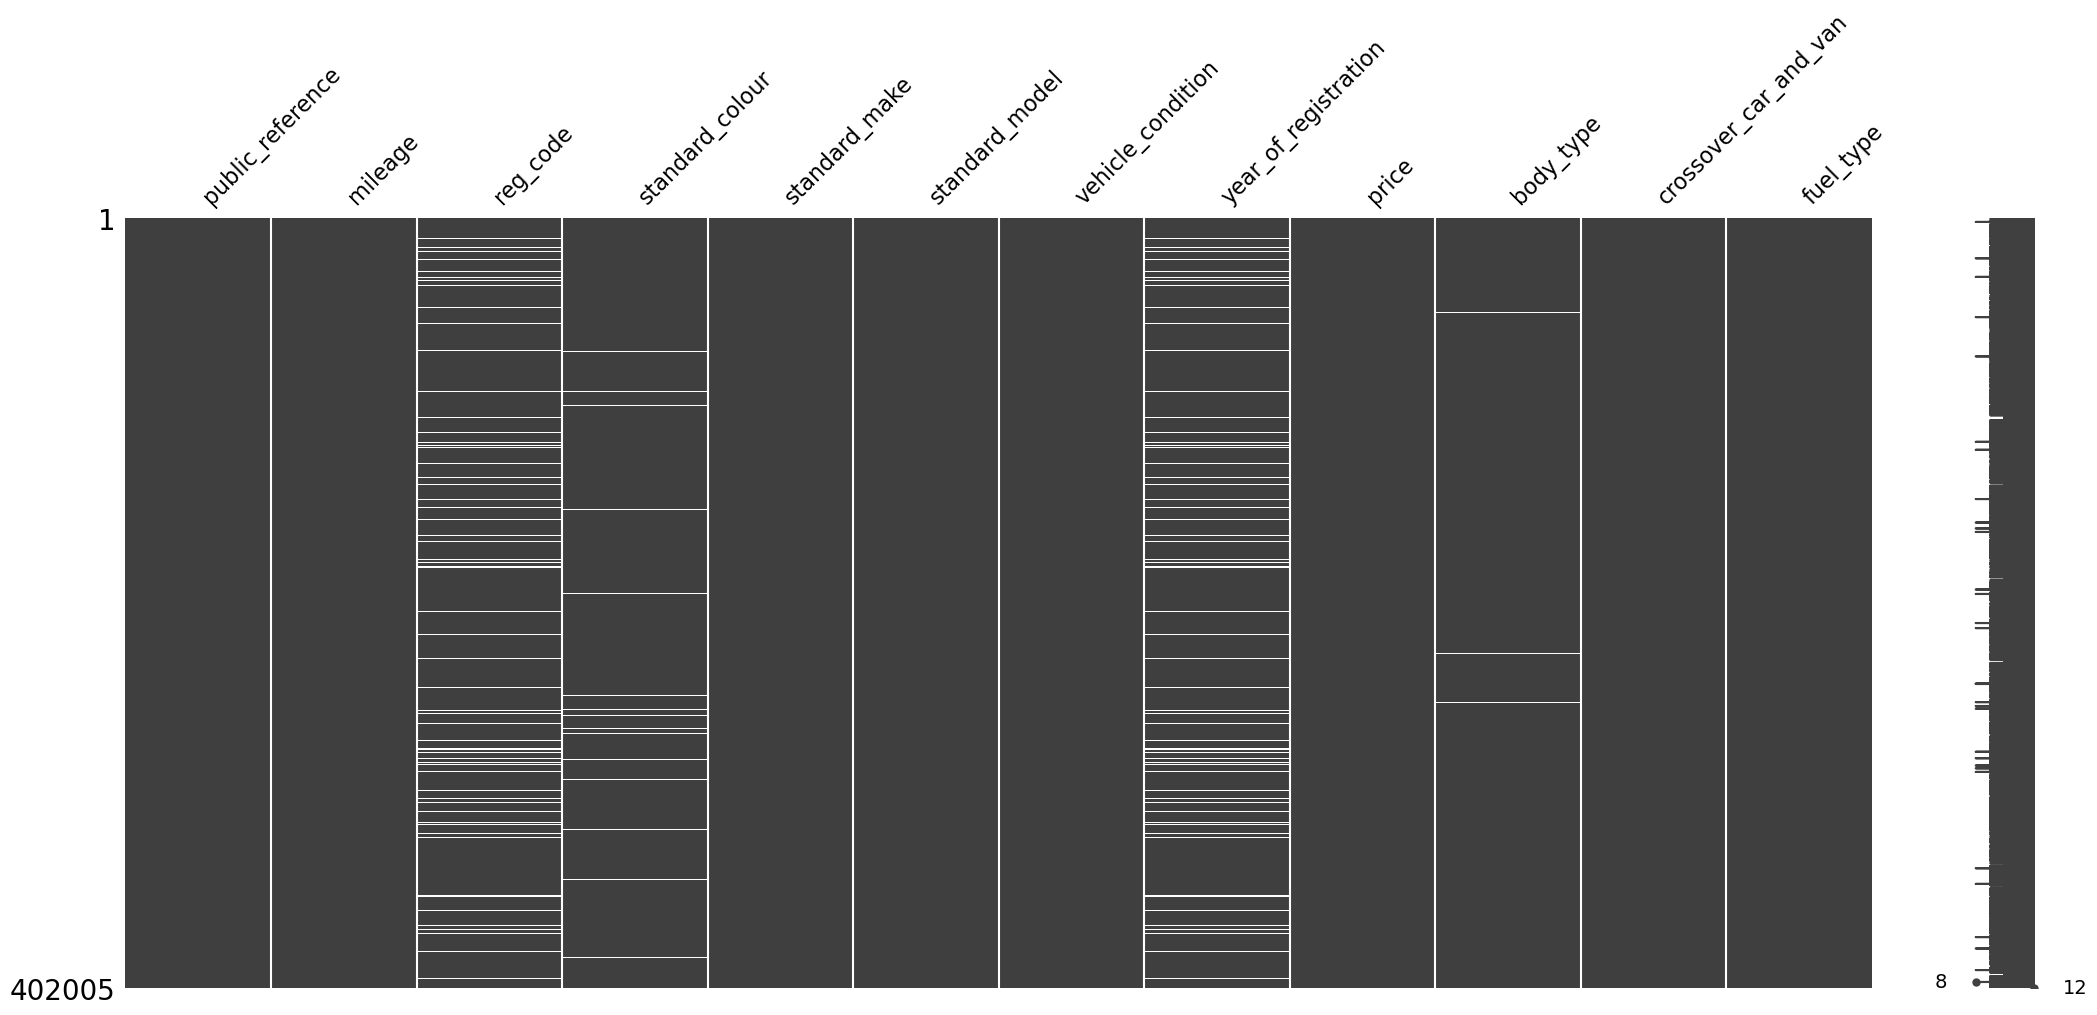

In [21]:
import missingno as msno
msno.matrix(df)

In [22]:
#Now counts values in objects datatypes
df.value_counts()

public_reference  mileage   reg_code  standard_colour  standard_make  standard_model  vehicle_condition  year_of_registration  price  body_type  crossover_car_and_van  fuel_type    
201307177852187   4000.0    12        White            Renault        Twizy           USED               2012.0                7000   Coupe      False                  Electric         1
202010134947670   50431.0   15        Grey             Vauxhall       Corsa           USED               2015.0                6295   Hatchback  False                  Petrol           1
202010134947388   35000.0   65        Blue             Fiat           500X            USED               2015.0                8495   SUV        False                  Petrol           1
202010134947382   114979.0  56        Silver           BMW            3 Series        USED               2006.0                2490   Coupe      False                  Petrol           1
202010134947380   15.0      70        White            Toyota         

In [23]:
df.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [25]:
df.year_of_registration.value_counts()

2017.0    68790
2016.0    43483
2019.0    39236
2018.0    38300
2015.0    29019
          ...  
1010.0        1
1934.0        1
1016.0        1
1063.0        1
1015.0        1
Name: year_of_registration, Length: 84, dtype: int64

In [27]:
#Now calculating age to the card
from datetime import date
#date.today().year, we will get year
df['car-age'] = date.today().year - df.year_of_registration

In [31]:
#Now removing null values in car age
df['car-age'].value_counts()

6.0       68790
7.0       43483
4.0       39236
5.0       38300
8.0       29019
          ...  
1013.0        1
89.0          1
1007.0        1
960.0         1
1008.0        1
Name: car-age, Length: 84, dtype: int64

In [32]:
#we can see age 6 is mode of the dataset so repalce nan with 6
df['car-age'].fillna(6.0, inplace=True)
df.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,car-age
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid,6.0
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel,12.0
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol,6.0
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel,7.0
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel,8.0


In [34]:
#replace nna values in year_of_registration as well with its mode
#its mode is 2017
df.year_of_registration.fillna(2017, inplace=True)

In [38]:
#now remove public_reference and reg_code from dataset
df.drop(['public_reference', 'reg_code'],inplace=True, axis=1)

In [39]:
df.head()

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,car-age
0,0.0,Grey,Volvo,XC90,NEW,2017.0,73970,SUV,False,Petrol Plug-in Hybrid,6.0
1,108230.0,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel,12.0
2,7800.0,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol,6.0
3,45000.0,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel,7.0
4,64000.0,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel,8.0


In [40]:
#Now counts standard_colour
df.standard_colour.value_counts()

Black          86287
White          70535
Grey           68227
Blue           59784
Silver         49323
Red            42024
Green           4534
Orange          4088
Yellow          2097
Brown           2014
Multicolour     1854
Beige           1539
Bronze          1330
Purple          1211
Gold             818
Pink             410
Turquoise        307
Maroon           159
Burgundy          63
Magenta           15
Navy               7
Indigo             1
Name: standard_colour, dtype: int64

In [41]:
#standard colour has null values repalce it with its mode that is Black
df.standard_colour.isna().sum()

5378

In [43]:
#Remove null values with mode Black
df.fillna('Black', inplace=True)
df.standard_colour.isna().sum()

0

In [44]:
#Now checking null values in our dataset
df.isna().sum()

mileage                  0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
car-age                  0
dtype: int64

In [45]:
#now we dont have null values in our dataset, now checking duplicates values in our dateset and then remove those
#duplicates values from dataset
df.groupby(df.columns.tolist(),as_index=False).size()

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,car-age,size
0,0.0,Beige,Citroen,C1,NEW,2017.0,13585,Hatchback,False,Petrol,6.0,1
1,0.0,Beige,Citroen,C1,NEW,2017.0,13985,Hatchback,False,Petrol,6.0,2
2,0.0,Beige,Citroen,C1,NEW,2017.0,14055,Hatchback,False,Petrol,6.0,1
3,0.0,Beige,Dacia,Duster,NEW,2017.0,12691,SUV,False,Petrol,6.0,1
4,0.0,Beige,Dacia,Duster,NEW,2017.0,13155,SUV,False,Petrol,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
393219,Black,White,Suzuki,Ignis,USED,2020.0,10990,Hatchback,False,Petrol Hybrid,3.0,1
393220,Black,White,Suzuki,Swift,USED,2020.0,10490,Hatchback,False,Petrol Hybrid,3.0,1
393221,Black,White,Toyota,Hilux,USED,2007.0,2500,Pickup,True,Diesel,16.0,1
393222,Black,White,Vauxhall,Corsa,USED,2018.0,9400,Hatchback,False,Petrol,5.0,1


In [47]:
#now we have drop duplicates values from dataset
df = df.drop_duplicates()
df.shape

(393224, 11)

In [48]:
#Now checking condition of the vehicle
df.vehicle_condition.value_counts()

USED    368784
NEW      24440
Name: vehicle_condition, dtype: int64

In [50]:
#Now importing LabelEncoder to convert into values
from sklearn.preprocessing import LabelEncoder

#creating object of labelenocder
label_encoder = LabelEncoder()
df.vehicle_condition = label_encoder.fit_transform(df.vehicle_condition)
df.vehicle_condition.unique()

array([0, 1], dtype=int64)

Smiliar way you can change other features into numerical data

## I just used basic data analysis you can use other pandas methods like

1- Remove outliers using quatiles

2- Remove missing values with imputation methods like mean, medain and mode

3- Convert Categorical values with numerical values
